In [23]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns

df = pd.read_csv('train.csv', index_col='ID')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4


In [24]:
inputs = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']].as_matrix()
outputs = df['medv'].as_matrix()

inputs, outputs

(array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
           1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
        [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
           1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
        [  3.23700000e-02,   0.00000000e+00,   2.18000000e+00, ...,
           1.87000000e+01,   3.94630000e+02,   2.94000000e+00],
        ..., 
        [  4.52700000e-02,   0.00000000e+00,   1.19300000e+01, ...,
           2.10000000e+01,   3.96900000e+02,   9.08000000e+00],
        [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
           2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
        [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
           2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]),
 array([ 24. ,  21.6,  33.4,  36.2,  22.9,  15. ,  18.9,  21.7,  20.4,
         18.2,  19.9,  23.1,  20.2,  13.6,  19.6,  15.2,  14.5,  14.8,
         12.7,  14.5,  13.5,  24.7,  30.8,  34.9, 

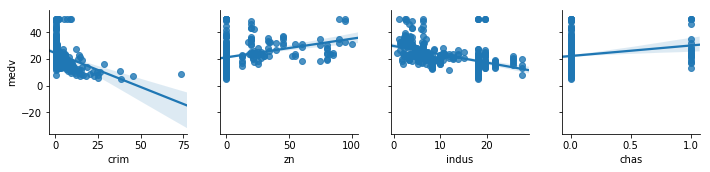

In [35]:
plt = sns.pairplot(
    x_vars=['crim', 'zn', 'indus', 'chas'], 
    y_vars=['medv'], data=df, kind="reg")

plt

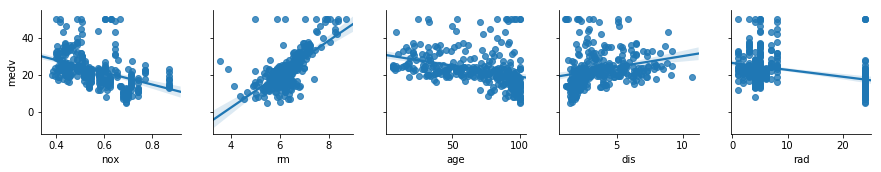

In [36]:
plt = sns.pairplot(
    x_vars=['nox', 'rm', 'age', 'dis', 'rad'], 
    y_vars=['medv'], data=df, kind="reg")

plt

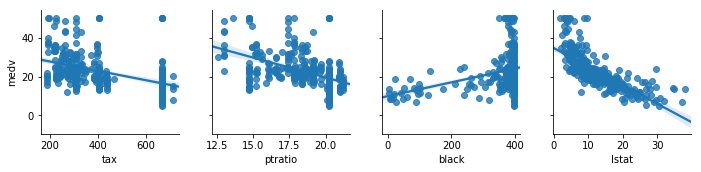

In [37]:
plt = sns.pairplot(
    x_vars=['tax', 'ptratio', 'black', 'lstat'], 
    y_vars=['medv'], data=df, kind="reg")

plt

In [57]:
from sklearn import linear_model as lm
from sklearn import tree

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(inputs, outputs, train_size=0.80, random_state=1)

model = lm.LinearRegression()
model.fit(train_inputs, train_classes)
model.score(test_inputs, test_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.67295800050994814

In [59]:
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(inputs, outputs, train_size=0.80, random_state=1)

model = tree.DecisionTreeRegressor()
model.fit(train_inputs, train_classes)
model.score(test_inputs, test_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.58821770001105578

In [68]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score



(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(inputs, outputs, train_size=0.80, random_state=1)

regressor = tree.DecisionTreeRegressor()
params = {'max_depth': list(range(1, 1000))}
scoring_fnc = make_scorer(performance_metric)

model = GridSearchCV(regressor, params)
model.fit(train_inputs, train_classes)
model.best_estimator_.score(train_inputs, train_classes)

/home/atta/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


1.0

In [ ]:
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(inputs, outputs, train_size=0.80, random_state=1)

model = tree.DecisionTreeRegressor()
model.fit(train_inputs, train_classes)
model.score(test_inputs, test_classes)